## Q1:

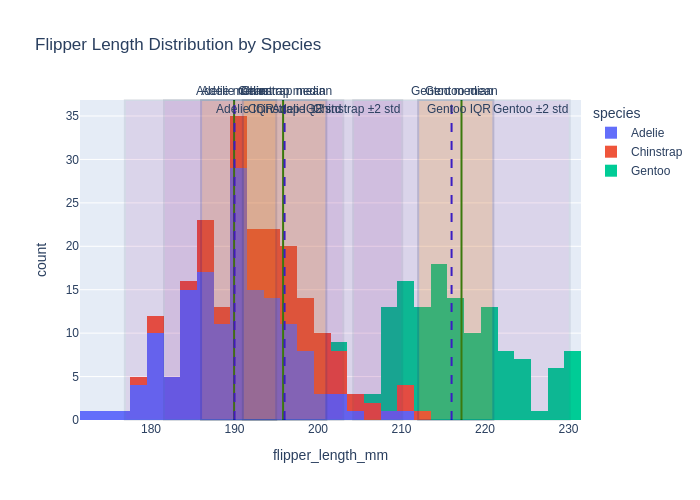

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Inspecting the dataset to ensure it loaded properly
penguins.head()

# Calculate statistics for flipper_length_mm by species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'min', 'max', 'std', 'quantile']).reset_index()

# Calculate additional metrics for visualization: IQR and ±2 standard deviations
species_stats['q1'] = penguins.groupby('species')['flipper_length_mm'].quantile(0.25).values
species_stats['q3'] = penguins.groupby('species')['flipper_length_mm'].quantile(0.75).values
species_stats['iqr'] = species_stats['q3'] - species_stats['q1']
species_stats['lower_2std'] = species_stats['mean'] - 2 * species_stats['std']
species_stats['upper_2std'] = species_stats['mean'] + 2 * species_stats['std']

# Preparing histograms with flipper length
fig = px.histogram(penguins, x="flipper_length_mm", color="species", nbins=30, title="Flipper Length Distribution by Species")

# Adding annotations for each species
for i, row in species_stats.iterrows():
    # Mean line
    fig.add_vline(x=row['mean'], line_dash="solid", line_color="green", annotation_text=f"{row['species']} mean", annotation_position="top")
    
    # Median line
    fig.add_vline(x=row['median'], line_dash="dash", line_color="blue", annotation_text=f"{row['species']} median", annotation_position="top")
    
    # IQR shaded region
    fig.add_vrect(x0=row['q1'], x1=row['q3'], fillcolor="orange", opacity=0.2, annotation_text=f"{row['species']} IQR")
    
    # ±2 standard deviations
    fig.add_vrect(x0=row['lower_2std'], x1=row['upper_2std'], fillcolor="purple", opacity=0.1, annotation_text=f"{row['species']} ±2 std")

# Show the figure
fig.show(renderer="png")


## Q2:

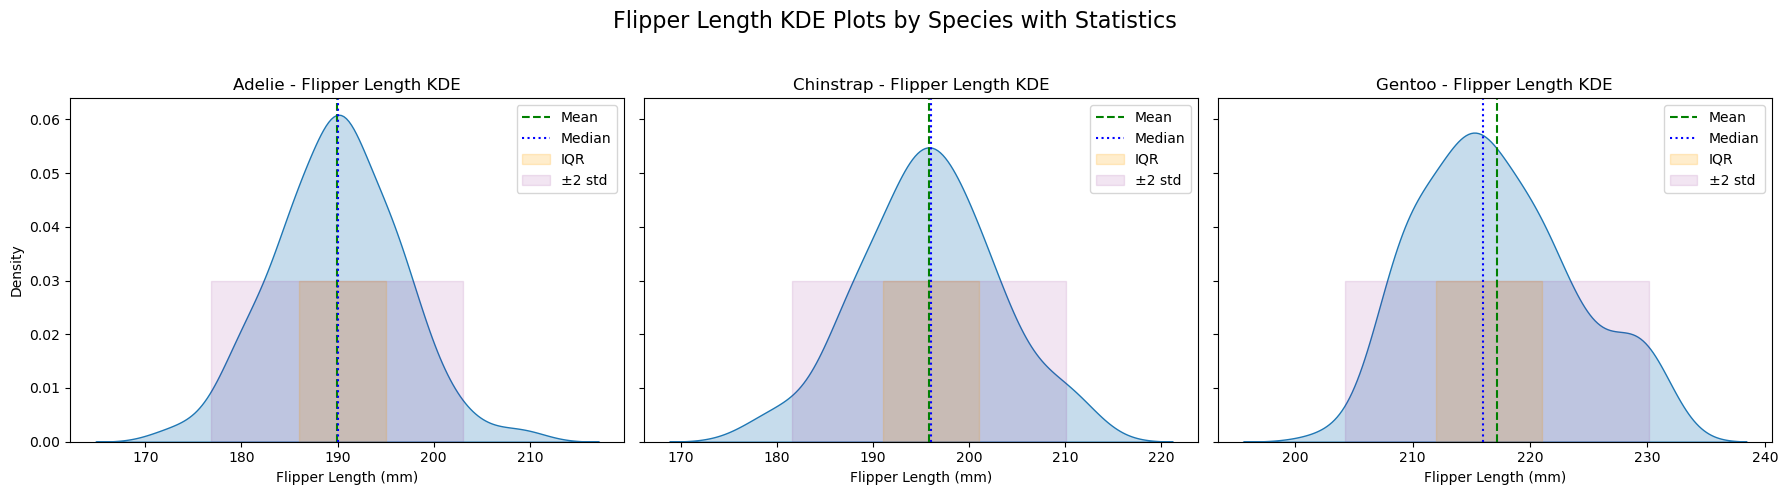

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing values in 'flipper_length_mm'
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Set the figure size and the layout for three plots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Define species
species = penguins_clean['species'].unique()

# Loop through each species to create individual KDE plots
for i, sp in enumerate(species):
    subset = penguins_clean[penguins_clean['species'] == sp]
    sns.kdeplot(data=subset, x='flipper_length_mm', ax=axes[i], fill=True)
    
    # Adding mean and median lines
    mean = subset['flipper_length_mm'].mean()
    median = subset['flipper_length_mm'].median()
    
    # Adding vertical lines for mean and median
    axes[i].axvline(mean, color='green', linestyle='--', label='Mean')
    axes[i].axvline(median, color='blue', linestyle=':', label='Median')
    
    # Adding IQR region
    q1 = subset['flipper_length_mm'].quantile(0.25)
    q3 = subset['flipper_length_mm'].quantile(0.75)
    axes[i].fill_betweenx([0, 0.03], q1, q3, color='orange', alpha=0.2, label='IQR')
    
    # Adding ±2 standard deviations
    std = subset['flipper_length_mm'].std()
    lower_2std = mean - 2 * std
    upper_2std = mean + 2 * std
    axes[i].fill_betweenx([0, 0.03], lower_2std, upper_2std, color='purple', alpha=0.1, label='±2 std')
    
    # Set title and labels
    axes[i].set_title(f"{sp} - Flipper Length KDE")
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Set the main title and display the plots
plt.suptitle("Flipper Length KDE Plots by Species with Statistics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.show("png")


# Here’s a summary of our conversation:

Plotly Line and Rectangle Methods: We discussed fig.add_hline(), fig.add_vline(), fig.add_hrect(), and fig.add_vrect() functions in Plotly. These functions allow you to add horizontal and vertical lines and shaded rectangles to visualizations, often used for marking important points such as the mean, median, range, and standard deviations.

Penguins Dataset: You provided a pandas command to load the penguins dataset, and we explored how to visualize the flipper length distribution for each species. You wanted to mark statistical indicators such as the mean, median, range, IQR, and ±2 standard deviations onto a histogram using Plotly.

Error Handling: We encountered an issue with rendering interactive Plotly plots in this environment. I provided the code for generating histograms with the desired statistics, and suggested running it in your local Python environment.

Seaborn KDE Plots: You asked to switch to Seaborn KDE plots, split into three plots for each species. We attempted the plot but encountered data issues due to missing values. I provided an updated code that cleans the dataset and generates KDE plots with the relevant statistical annotations (mean, median, IQR, ±2 standard deviations).



### link: https://chatgpt.com/share/66f4d184-c588-8003-b0e4-c849880b063c

## Q3:

### link of box plots: https://www.google.com/imgres?q=box%20plots&imgurl=https%3A%2F%2Fmathsmadeeasy.co.uk%2Fwp-content%2Fuploads%2F2018%2F11%2Fboxplots-figure-1-e1597247984531.png&imgrefurl=https%3A%2F%2Fwww.national5maths.co.uk%2Fbox-plots%2F&docid=IxDlL-qw-F3V0M&tbnid=w4_uKivBNSoyTM&vet=12ahUKEwj39LWs5N-IAxVYl4kEHWfOA_oQM3oECBoQAA..i&w=750&h=316&hcb=2&ved=2ahUKEwj39LWs5N-IAxVYl4kEHWfOA_oQM3oECBoQAA

### link of histograms: https://www.google.com/imgres?q=histogram&imgurl=https%3A%2F%2Fwww.techtarget.com%2Frms%2Fonlineimages%2Fhistogram_of_test_scores-h_half_column_mobile.png&imgrefurl=https%3A%2F%2Fwww.techtarget.com%2Fsearchsoftwarequality%2Fdefinition%2Fhistogram&docid=xQXtD9yrdSGAgM&tbnid=adCU4Y1ebW4cAM&vet=12ahUKEwjdrrjU5N-IAxUwAHkGHf_KF2QQM3oFCIkBEAA..i&w=279&h=304&hcb=2&ved=2ahUKEwjdrrjU5N-IAxUwAHkGHf_KF2QQM3oFCIkBEAA

### link of kernel density estimators: https://www.google.com/imgres?q=kernel%20density%20estimators&imgurl=https%3A%2F%2Fscikit-learn.org%2Fstable%2F_images%2Fsphx_glr_plot_kde_1d_003.png&imgrefurl=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fdensity.html&docid=SrZGLn9A8--BNM&tbnid=ry6XJkMQR149RM&vet=12ahUKEwi34IL45N-IAxVjpIkEHdN6HmYQM3oECHYQAA..i&w=640&h=480&hcb=2&ved=2ahUKEwi34IL45N-IAxVjpIkEHdN6HmYQM3oECHYQAA

## Here’s a summary of our conversation:

Data Visualization Methods:

You explained how box plots, histograms, and kernel density estimators (KDEs) represent data distributions. We refined the details:
Box plots: Summarize data with key statistics (min, max, Q1, median, Q3) and help visualize outliers, spread, and skewness.
Histograms: Group data into bins to show the distribution's shape, but are sensitive to bin size.
KDEs: Provide a smooth, continuous curve of the data distribution but require careful tuning of bandwidth.
Pros and Cons of Each Method:

We discussed the advantages and disadvantages of box plots, histograms, and KDEs for visualizing data distributions, focusing on factors like detail, ease of interpretation, and handling of small/large datasets.
Box Plot Preference:

You prefer box plots because they effectively display important statistics (like Q1, Q2, Q3, and Q4) and give a clear picture of how the majority of the data is distributed.

### link: https://chatgpt.com/share/66f4e407-2578-8003-a8b1-303ef1457928

## Q4:

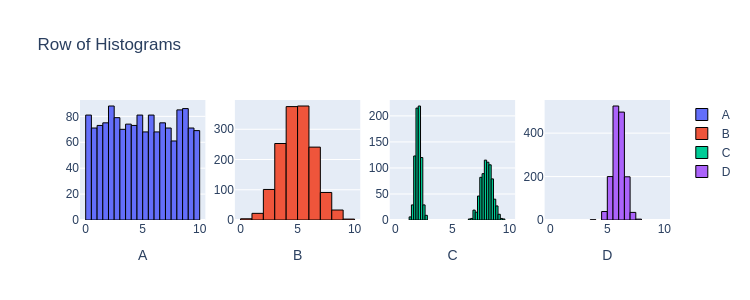

In [10]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#### Answers:
1. Datasets B and C have similar means and variances.
2. Datasets A and B have similar means but different variances.
3. Datasets A and D have similar variances but different means.
4. Datasets A and D have different means and variances.
   

## Q5:

### I think in right skewness, mean is greater than median because the majority of data is distributed in the part where values are relatively smaller, and in left skewness, mean is less than median because the majority of data is distributed in the part where values are relatively bigger.

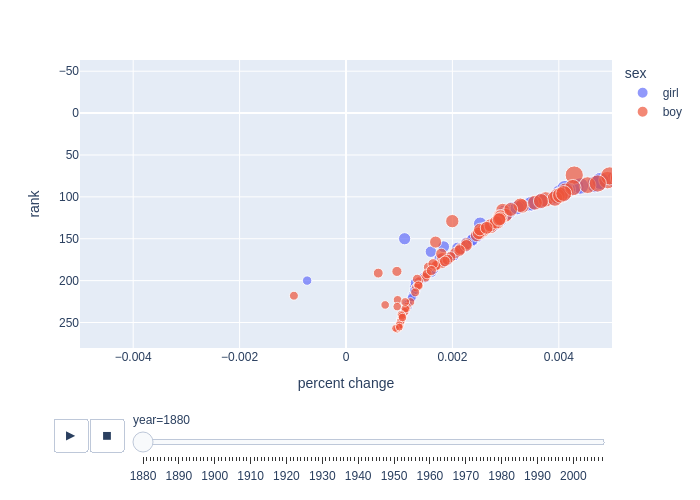

In [9]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Right-Skewed Distribution (Gamma Distribution)
sample_right_skew = stats.gamma(a=2, scale=2).rvs(size=1000)

# Left-Skewed Distribution (Beta Distribution)
# The Beta distribution with alpha > beta tends to be left-skewed
sample_left_skew = stats.beta(a=2, b=5).rvs(size=1000)

# Creating a DataFrame with both samples
df = pd.DataFrame({
    'Right Skewed (Gamma)': sample_right_skew,
    'Left Skewed (Beta)': sample_left_skew
})

# Plot histograms
fig_right_skew = px.histogram(df, x="Right Skewed (Gamma)", title="Right-Skewed Distribution (Gamma)")
fig_left_skew = px.histogram(df, x="Left Skewed (Beta)", title="Left-Skewed Distribution (Beta)")

# Show plots
fig_right_skew.show()
fig_left_skew.show()
fig.show(renderer="png")


## Here's a summary of our conversation:

Mean and Median:

The mean is the average of a dataset, sensitive to outliers.
The median is the middle value of a dataset, more robust to outliers.
In right-skewed distributions, the mean is greater than the median, while in left-skewed distributions, the mean is less than the median.

Code Explanation (Gamma Distribution):

You used a Gamma distribution to generate random samples with a=2 and scale=2, creating a right-skewed distribution.
A histogram of the Gamma-distributed data illustrates the right-skewed nature of the distribution (data concentrated on the left, tail stretching to the right).

Skewness and Extended Code:

I provided extended code that demonstrates both right-skewness (using the Gamma distribution) and left-skewness (using the Beta distribution).
The histograms visualize these distributions: the right-skewed distribution has a peak on the left and a tail to the right, while the left-skewed distribution has a peak on the right and a tail to the left.

### links: https://chatgpt.com/share/66f4edc8-e890-8003-901f-c7cf8b578f56

## Q6:

In [2]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


In [8]:
df.isnull

<bound method DataFrame.isnull of      restaurant id  category id  item id  serving size (oz)  calories  \
0             1000          100        0                4.8       300   
1             1000          100        1                4.8       250   
2             1000          100        2                3.9       370   
3             1000          100        3                5.7       450   
4             1000          100        4                5.7       400   
..             ...          ...      ...                ...       ...   
745           3000          130      745                NaN       180   
746           3000          130      746                NaN       190   
747           3000          100      747                NaN       340   
748           3000          100      748                NaN        90   
749           3000          100      749                NaN        90   

     calories from fat total fat (g)  total fat (% daily value)  \
0                120.0

In [4]:
df_isna = df.isna()
print(df_isna.dtypes)

restaurant id                    bool
category id                      bool
item id                          bool
serving size (oz)                bool
calories                         bool
calories from fat                bool
total fat (g)                    bool
total fat (% daily value)        bool
saturated fat (g)                bool
saturated fat (% daily value)    bool
trans fat (g)                    bool
cholesterol (mg)                 bool
cholesterol (% daily value)      bool
sodium (mg)                      bool
sodium (% daily value)           bool
carbohydrates (g)                bool
carbohydrates (% daily value)    bool
dietary fiber (g)                bool
dietary fiber (% daily value)    bool
sugars (g)                       bool
protein (g)                      bool
vitamin a (% daily value)        bool
vitamin c (% daily value)        bool
calcium (% daily value)          bool
iron (% daily value)             bool
dtype: object


## Q8:

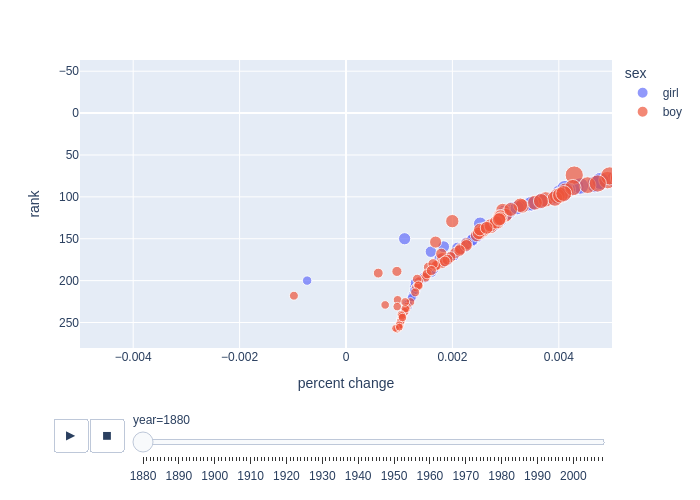

In [8]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png")

## Q9:

### Somewhat